In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

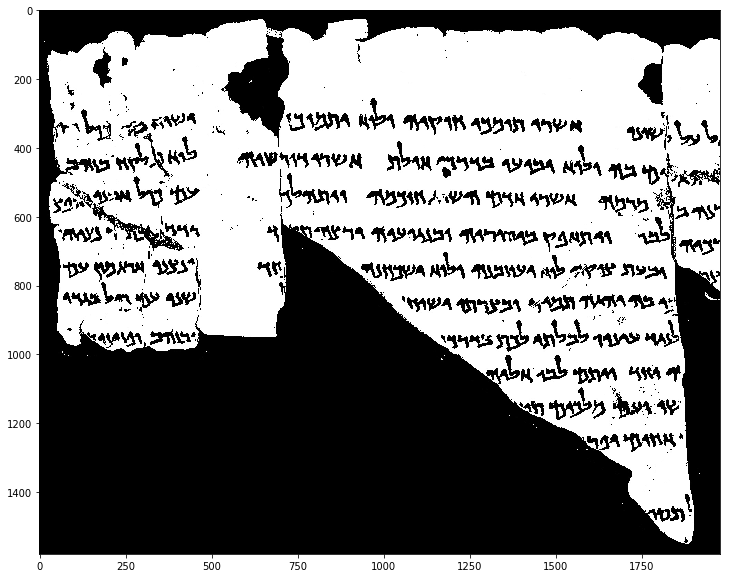

In [126]:
path = 'image-output/test14_binarized.jpg'
path_gray = 'image-output/test14_extracted.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_gray = cv2.imread(path_gray, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [127]:
#_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image_bin = np.array(image)

In [128]:
#image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
#image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


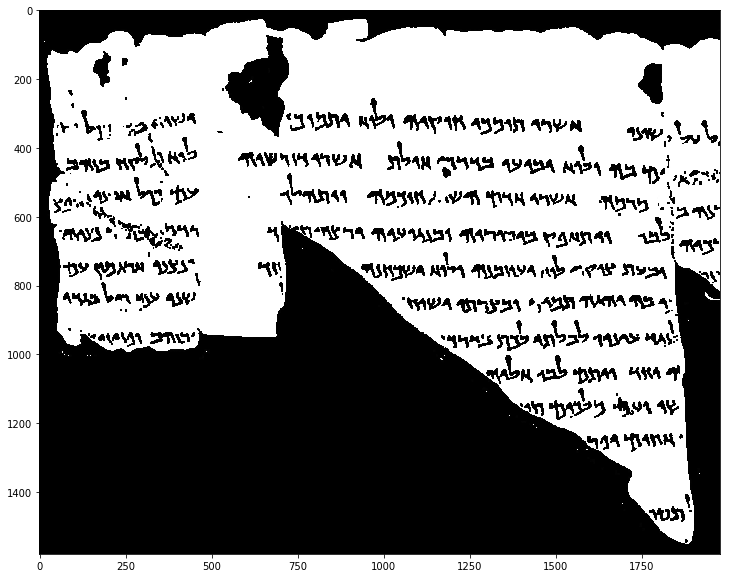

In [129]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [130]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin

In [131]:
n_labels

362

In [132]:
stats

array([[     13,      25,    1965,    1526, 1558684],
       [      0,       0,    1978,    1580, 1305535],
       [    539,      72,     188,     297,   29282],
       ...,
       [   1773,    1445,      61,      40,    1308],
       [   1886,    1448,      10,      10,      81],
       [   1875,    1534,      11,      13,     114]], dtype=int32)

In [133]:
min_thresh = 400
max_thresh = 10000
boxes = []
box_centroids = []
for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        temp_stat = np.append(stats[i], centroids[i])
        boxes.append(temp_stat)
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

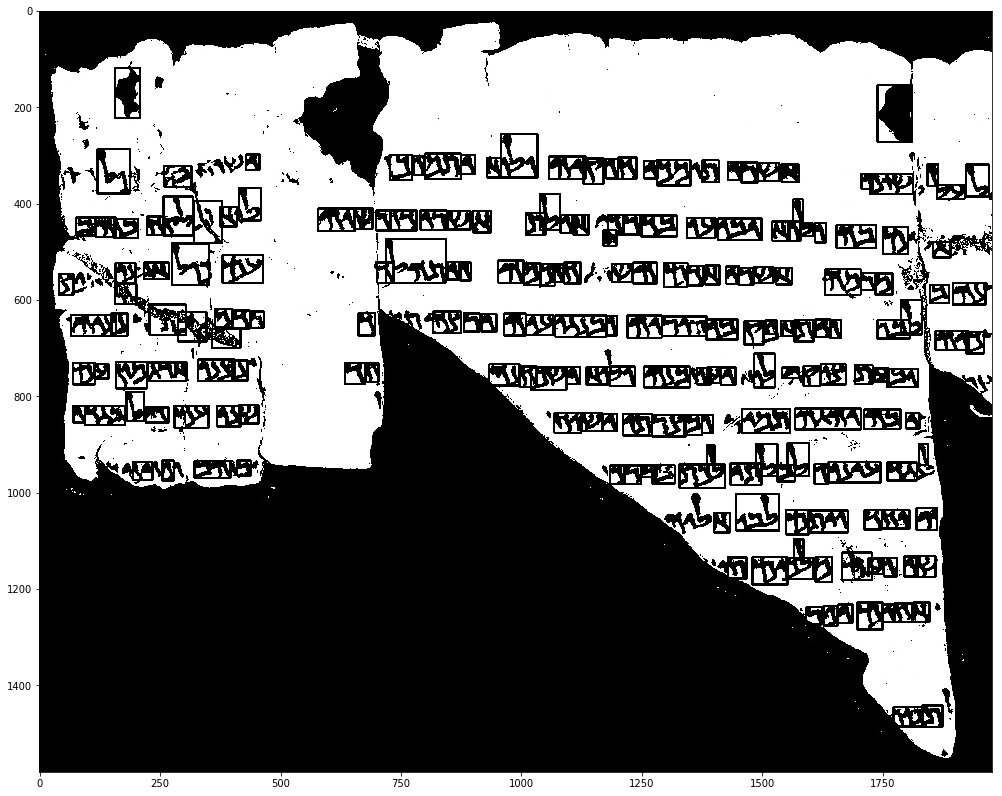

In [134]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [135]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [136]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N

avg_height *= 1

In [137]:
avg_width

46.80487804878049

In [138]:
avg_height

44.35609756097561

In [149]:
box_threshold = avg_height * 2
line_count_threshold = 2

word_lines = []
line = []

# calculate average centroids for each line
line.append(boxes[0][6])
line.append(1)
word_lines.append(line)
for temp_i in range(len(boxes) - 1):
    i = temp_i + 1
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box[6]
    box_height = box[3]
    
    if box_height < box_threshold:
        empty_flag = True
        for temp_line in word_lines:
            temp_centroid = temp_line[0]
            if(centroid_y >= (temp_centroid - avg_height) and (centroid_y <= temp_centroid + avg_height)):
                empty_flag = False
                temp_line[0] = (temp_line[0] * temp_line[1] + centroid_y) / (temp_line[1] + 1)
                temp_line[1] += 1
        if empty_flag:
            line = []
            line.append(box[6])
            line.append(1)
            word_lines.append(line)
            
for line in word_lines:
    if line[1] < line_count_threshold:
        line[0] = -100
    print(line)
    
    
# include boxes within certain height of the average centroids
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box[6]
    box_height = box[3]
    
    if box_height < box_threshold:
        empty_flag = True
        for temp_line in word_lines:
            temp_centroid = temp_line[0]
            if(centroid_y >= (temp_centroid - avg_height) and (centroid_y <= temp_centroid + avg_height)):
                temp_line.append(box)

for line in word_lines:
    line.pop(0)
    line.pop(0)

[-100, 1]
[333.8561135050523, 23]
[442.28522683220024, 32]
[548.3998192383386, 29]
[653.802748649147, 29]
[753.2382264867182, 25]
[845.6515288315605, 18]
[949.6891741791678, 18]
[1054.9180690807405, 7]
[1149.7357417745075, 10]
[1249.4164951599432, 7]
[1463.572690834595, 2]


In [150]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
height,width = image.shape

In [151]:
line_image = np.array(image)

In [157]:
# to preserve more line spacebased on average_height
line_buffer_fraction = 0.1
line_buffer = int(line_buffer_fraction * avg_height)

#save strips
strips = []

# draw lines for the first strip
for line in word_lines:
    if len(line) > 0:
        min_height = 999999
        max_height = 0
        for box in line:
            if(box[1] < min_height):
                min_height = box[1]
            if(box[1] + box[3]  > max_height):
                max_height = box[1] + box[3] 

        min_height = int(min_height)
        max_height = int(max_height)

        cv2.line(line_image,(0, min_height),(width, min_height),(0, 200,0), 4)   
        cv2.line(line_image,(0, max_height),(width, max_height),(0, 200,0), 4) 

        min_height = 0 if (min_height - line_buffer) < 0 else (min_height - line_buffer)
        x=True if 'a'=='a' else False
        max_height = height if (max_height + line_buffer) > height else (max_height + line_buffer)
        strips.append([min_height, max_height])
    

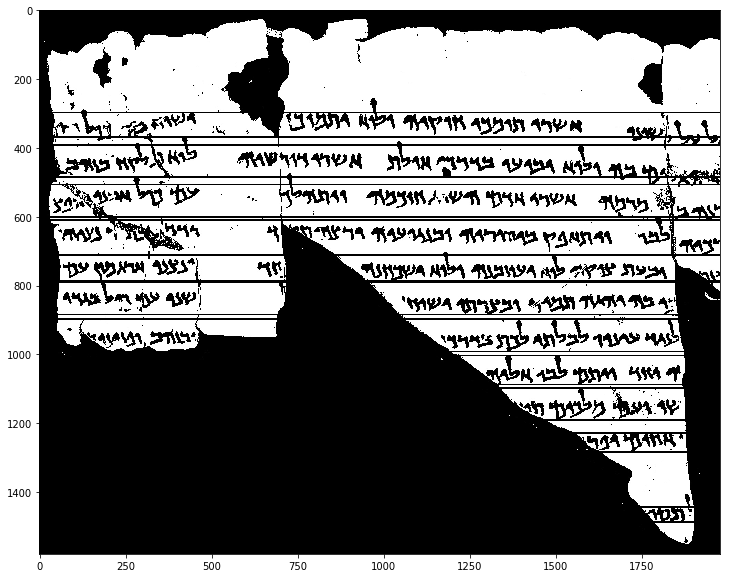

In [159]:
plt.figure(figsize = (500,10))
plt.imshow(line_image, cmap='gray', aspect = 1)
plt.show()

293 395


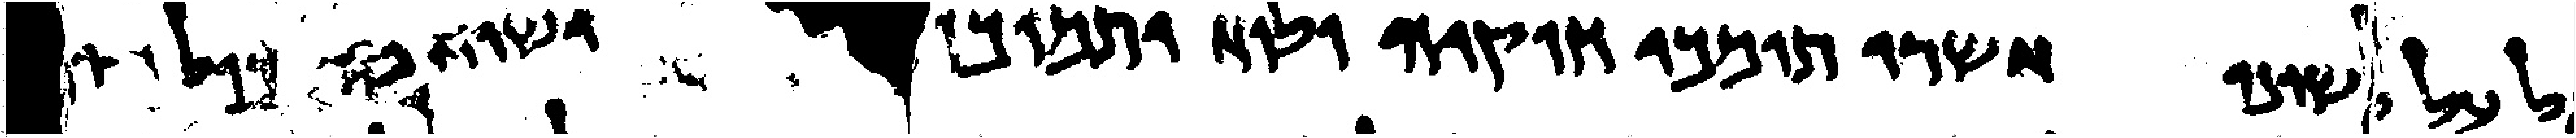

In [166]:
[y1, y2] = strips[0] 

strip_img = image[y1:y2, 0:width]
strip_img_gray = image_gray[y1:y2, 0:width]
print(y1,y2)
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

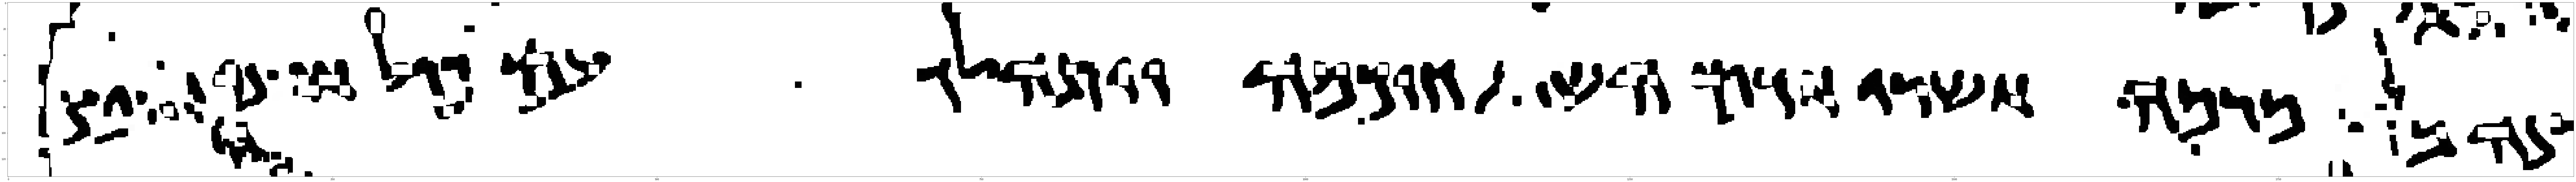

In [87]:
strip_img = cv2.morphologyEx(strip_img, cv2.MORPH_CLOSE, kernel)
#strip_img = cv2.GaussianBlur(strip_img, (5,5) , 0)
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)
n_labels
mx = 0
background_index = 0
"""for i in range(len(stats)):
    if(stats[i][0] == 0 and stats[i][1] == 0):
        background_index = i
background = stats[background_index]

height, width = strip_img.shape
for i in range(height):
    for j in range(width):
        if(labels[i][j] == background_index):
            strip_img[i][j] = 255
"""

strip_img[strip_img == 0] = 255

plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [88]:
strip_img = 255 - strip_img

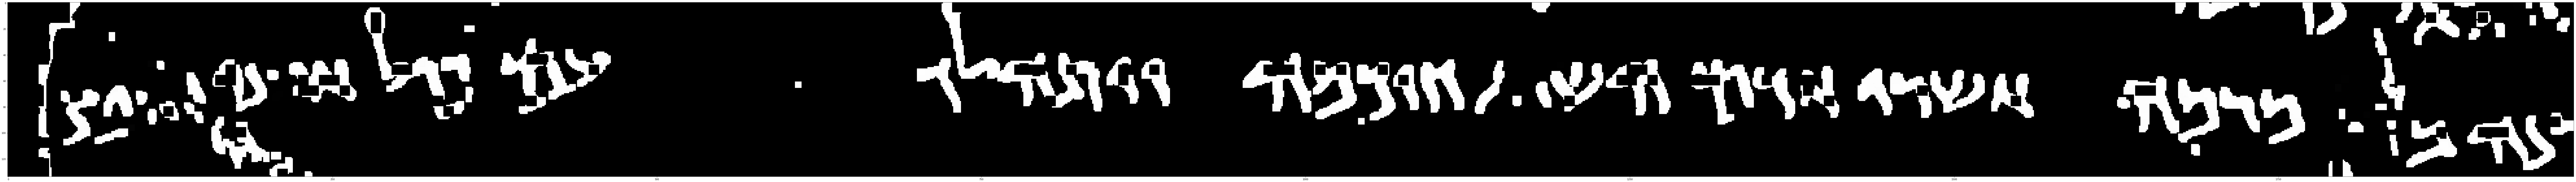

In [89]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [90]:
strip_img = cv2.dilate(strip_img,kernel,iterations = 2)
strip_img = cv2.GaussianBlur(strip_img, (9,9), 0)
_, strip_img = cv2.threshold(strip_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



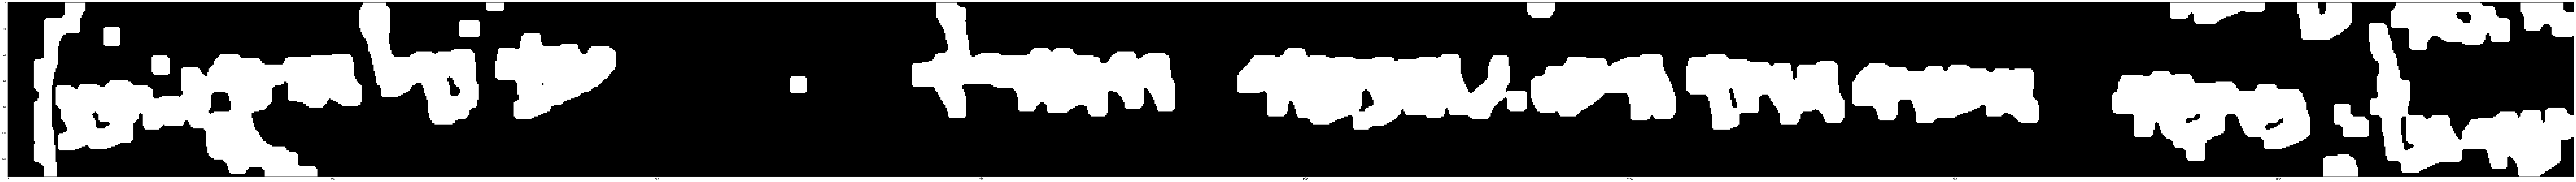

In [91]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [92]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)

In [93]:
n_labels

24

In [94]:
stats

array([[     0,      0,   1978,    134, 193348],
       [    20,      0,     40,    134,   2069],
       [   271,      0,     92,     94,   3927],
       [   369,      0,     14,      7,     96],
       [   697,      0,    203,     89,   8060],
       [  1171,      0,     22,     12,    243],
       [  1667,      0,     73,     17,    863],
       [  1765,      0,     42,     29,   1023],
       [  1837,      0,     92,     37,   2470],
       [  1937,      0,     41,     27,    847],
       [   348,     14,     16,     13,    204],
       [  1820,     16,    158,    118,   6652],
       [    74,     19,     13,     15,    191],
       [   376,     24,     93,     66,   3702],
       [   948,     35,    223,     63,   8974],
       [   111,     41,     14,     15,    202],
       [    37,     40,    236,     94,  10924],
       [  1174,     40,    112,     51,   4057],
       [  1294,     40,    122,     58,   4757],
       [  1422,     47,    144,     46,   5038],
       [  1622,     

In [95]:
idx = 2

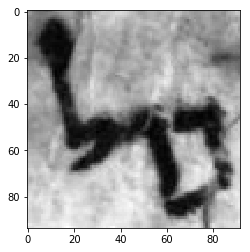

In [96]:
strip_img = image[y1:y2, 0:stats[0][2]]
plt.figure(figsize = (500,4))
#plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.imshow(strip_img_gray[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]], cmap='gray', aspect = 1)
plt.show()

In [97]:
#write found words to folder
counter = 1
for i in range(n_labels):
    if(stats[i][4] > 1000 and i != 0):
        word = strip_img[stats[i][1]:stats[i][1]+stats[i][3], stats[i][0]:stats[i][0]+stats[i][2]]
        path = 'word-images/word' + str(counter) + '.png'
        counter += 1
        cv2.imwrite(path, word)